# Entropy of natural image tiles

In [5]:
#load packages
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('..')

import entropy

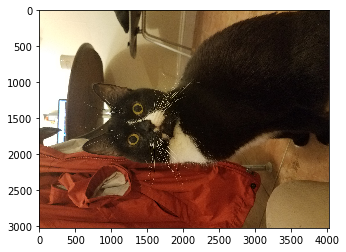

In [6]:
#load image
I = plt.imread('./test2.jpg')

#and show it
plt.imshow(I)
plt.show()

#that's my cat, Rosalind Franklin 🐾

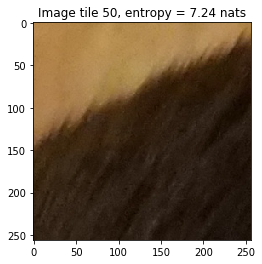

In [26]:
#Tile image into overlapping 256x256 tiles and put into a list
W = 256 #tile width
step = 128 #tile step
list_I = []
for jj in np.arange(0,I.shape[0]-W,step):
    for ii in np.arange(1,I.shape[1]-W,step):
        list_I.append(I[jj:jj+W,ii:ii+W])
        
#show a random tile
i_tile = 50
plt.imshow(list_I[i_tile])
plt.title('Image tile {}, entropy = {:.2f} nats'.format(i_tile,entropy.iment(list_I[i_tile])))
plt.show()

In [32]:
#Calculate the entropy for each image tile in list_I
#try changing conversion='rgb2gray' to see effect
HH = entropy.iment_batch(list_I,conversion=None)

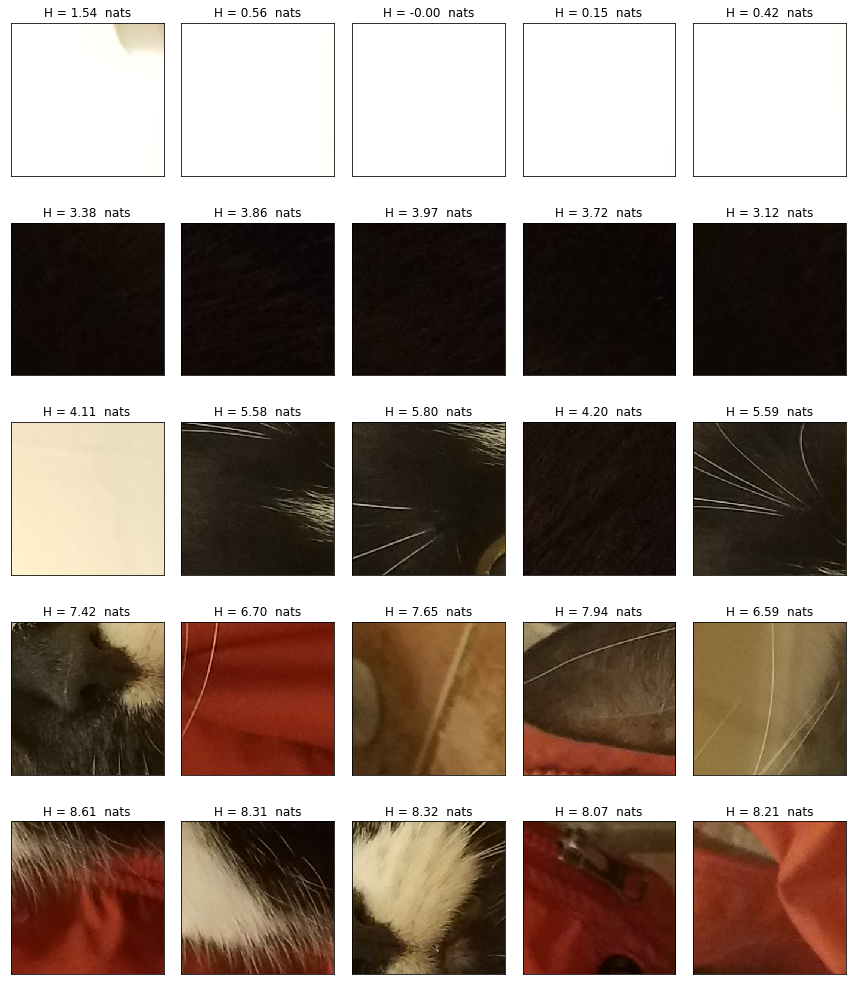

In [46]:
#sort entropy into bins, and show example patches 
HBINS = [(0,2),(2,4),(4,6),(6,8),(8,10)]
#HBINS = [(0,1),(1,2),(2,3),(3,4),(4,5)] #use these bins with 'rgb2gray' conversion


n_examples = 5
f,ax = plt.subplots(len(HBINS),n_examples,figsize=(12,3*len(HBINS)))

for ibin,hbin in enumerate(HBINS):
    #select random 5 images with entropy in hbin
    inds = np.where((HH>=hbin[0]) & (HH<hbin[1]))[0]
    inds = np.random.permutation(inds)[:n_examples]

    for i,ind in enumerate(inds):
        ax[ibin,i].imshow(list_I[ind])
        ax[ibin,i].set_title('H = {0:.2f}  nats'.format(HH[ind]))
        ax[ibin,i].set_xticks([]); ax[ibin,i].set_yticks([])
    f.tight_layout()
    
plt.show()
#We can see that entropy can be used as a broad texture descriptor:
#0-2 nats: largely flat (saturated!) images
#2-4 nats: low texture, non-saturated image tiles
#4-6 nats: slight/medium texture
#6-8 nats: significant texture
#8+  nats: significant texture and multiple colors